## Data Cleaning

In [1]:
# Import Basic Libraries

import csv
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [2]:
# Import dataset

vgdata = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
# Drop unneccessary columns not relevant to our question

vgdata = vgdata.drop(columns=['Platform', 'Developer'])

In [4]:
# Check for null values in columns

vgdata.isnull().sum()

Name                  2
Year_of_Release     264
Genre                 2
Publisher            51
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         9010
User_Count         9010
Rating             6650
dtype: int64

In [5]:
# Remove rows where there are null values for certain column names

vgdata = vgdata.dropna(how="any", subset=['Year_of_Release', 'Name', 'Publisher', 'Genre'])

In [6]:
# Check if null values are dropped

vgdata.isnull().sum()

Name                  0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8320
Critic_Count       8320
User_Score         8841
User_Count         8841
Rating             6535
dtype: int64

In [7]:
# Remove leading and tailing whitespace for 'Name' 

vgdata['Name'] = vgdata['Name'].str.strip()

In [8]:
# Group the games with the same name together (combine same game on different platforms)

vgdata = vgdata.groupby('Name').agg({'Year_of_Release':'first', 'Genre':'first', 'Publisher':'first', 'NA_Sales':'sum', 'EU_Sales':'sum', 'JP_Sales':'sum', 'Other_Sales':'sum', 'Global_Sales':'sum', 'Critic_Score':'mean', 'Critic_Count':'mean', 'User_Score':'mean', 'Rating':'first'}).reset_index()
vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating
0,'98 Koshien,1998.0,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41,NaN,NaN,NaN,None
1,.hack//G.U. Vol.1//Rebirth,2006.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,None
2,.hack//G.U. Vol.2//Reminisce,2006.0,Role-Playing,Namco Bandai Games,0.11,0.09,0.16,0.03,0.39,NaN,NaN,NaN,None
3,.hack//G.U. Vol.3//Redemption,2007.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17,NaN,NaN,NaN,None
4,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.5,T


In [9]:
vgdata.isnull().sum()

Name                  0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       6244
Critic_Count       6244
User_Score         6626
Rating             5279
dtype: int64

In [10]:
# Remove rows where there are null values

vgdata = vgdata.dropna(how='any', subset=['Critic_Score', 'Critic_Count', 'User_Score', 'Rating'])

In [11]:
# Create new columns with 1st and 2nd words of Name

vgdata['1st_word'] = vgdata['Name'].str.split(' ').str[0]
vgdata['2nd_word'] = vgdata['Name'].str.split(' ').str[1]

vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word,2nd_word
4,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.500,T,.hack//Infection,Part
6,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.900,T,.hack//Mutation,Part
7,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.700,T,.hack//Outbreak,Part
10,007 Racing,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.600,T,007,Racing
11,007: Quantum of Solace,2008.0,Action,Activision,1.83,1.32,0.04,0.67,3.86,63.8,30.0,6.875,T,007:,Quantum


In [12]:
# For games that start with 'The', 'A' and 'My', replace 1st_word with 2nd_word

vgdata.loc[vgdata['1st_word'] == 'The', '1st_word'] = vgdata['2nd_word']
vgdata.loc[vgdata['1st_word'] == 'A', '1st_word'] = vgdata['2nd_word']
vgdata.loc[vgdata['1st_word'] == 'My', '1st_word'] = vgdata['2nd_word']

vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word,2nd_word
4,.hack//Infection Part 1,2002.0,Role-Playing,Atari,0.49,0.38,0.26,0.13,1.27,75.0,35.0,8.500,T,.hack//Infection,Part
6,.hack//Mutation Part 2,2002.0,Role-Playing,Atari,0.23,0.18,0.20,0.06,0.68,76.0,24.0,8.900,T,.hack//Mutation,Part
7,.hack//Outbreak Part 3,2002.0,Role-Playing,Atari,0.14,0.11,0.17,0.04,0.46,70.0,23.0,8.700,T,.hack//Outbreak,Part
10,007 Racing,2000.0,Racing,Electronic Arts,0.30,0.20,0.00,0.03,0.53,51.0,16.0,4.600,T,007,Racing
11,007: Quantum of Solace,2008.0,Action,Activision,1.83,1.32,0.04,0.67,3.86,63.8,30.0,6.875,T,007:,Quantum


In [13]:
# Drop 2nd_word column

vgdata = vgdata.drop(columns=['2nd_word'])

In [14]:
# Sort by Publisher, then by 1st_word

vgdata = vgdata.sort_values(['Publisher', '1st_word'], ascending=[True, True])

vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word
7161,Pirates: Legend of the Black Buccaneer,2006.0,Adventure,10TACLE Studios,0.01,0.01,0.0,0.00,0.02,42.0,4.0,7.0,T,Pirates:
4858,King's Bounty: Armored Princess,2009.0,Role-Playing,1C Company,0.00,0.01,0.0,0.00,0.01,82.0,25.0,8.6,T,King's
5717,Men of War: Assault Squad,2011.0,Strategy,1C Company,0.01,0.03,0.0,0.01,0.05,77.0,21.0,8.2,T,Men
10969,World of Goo,2008.0,Puzzle,2D Boy,0.00,0.03,0.0,0.01,0.04,90.0,26.0,8.5,E,World
451,Army Men: Air Attack 2,2000.0,Action,3DO,0.17,0.11,0.0,0.02,0.30,74.0,8.0,5.3,T,Army


In [15]:
# Create two new columns (copies of 1st_word) for comparison

vgdata['1st_wordcopy'] = vgdata['1st_word'].shift(-1)
vgdata['1st_wordcopy2'] = vgdata['1st_word'].shift(1)

vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word,1st_wordcopy,1st_wordcopy2
7161,Pirates: Legend of the Black Buccaneer,2006.0,Adventure,10TACLE Studios,0.01,0.01,0.0,0.00,0.02,42.0,4.0,7.0,T,Pirates:,King's,NaN
4858,King's Bounty: Armored Princess,2009.0,Role-Playing,1C Company,0.00,0.01,0.0,0.00,0.01,82.0,25.0,8.6,T,King's,Men,Pirates:
5717,Men of War: Assault Squad,2011.0,Strategy,1C Company,0.01,0.03,0.0,0.01,0.05,77.0,21.0,8.2,T,Men,World,King's
10969,World of Goo,2008.0,Puzzle,2D Boy,0.00,0.03,0.0,0.01,0.04,90.0,26.0,8.5,E,World,Army,Men
451,Army Men: Air Attack 2,2000.0,Action,3DO,0.17,0.11,0.0,0.02,0.30,74.0,8.0,5.3,T,Army,Army,World


In [16]:
# Compare 1st_word of game titles (to check for any relation between the game titles)

vgdata['Compare'] = np.where(vgdata['1st_word'] == vgdata['1st_wordcopy'], 1, 0)
vgdata['Compare2'] = np.where(vgdata['1st_word'] == vgdata['1st_wordcopy2'], 1, 0)

vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word,1st_wordcopy,1st_wordcopy2,Compare,Compare2
7161,Pirates: Legend of the Black Buccaneer,2006.0,Adventure,10TACLE Studios,0.01,0.01,0.0,0.00,0.02,42.0,4.0,7.0,T,Pirates:,King's,NaN,0,0
4858,King's Bounty: Armored Princess,2009.0,Role-Playing,1C Company,0.00,0.01,0.0,0.00,0.01,82.0,25.0,8.6,T,King's,Men,Pirates:,0,0
5717,Men of War: Assault Squad,2011.0,Strategy,1C Company,0.01,0.03,0.0,0.01,0.05,77.0,21.0,8.2,T,Men,World,King's,0,0
10969,World of Goo,2008.0,Puzzle,2D Boy,0.00,0.03,0.0,0.01,0.04,90.0,26.0,8.5,E,World,Army,Men,0,0
451,Army Men: Air Attack 2,2000.0,Action,3DO,0.17,0.11,0.0,0.02,0.30,74.0,8.0,5.3,T,Army,Army,World,1,0


In [17]:
# Drop rows with two 0s (means current game title is not related to previous or next title)

vgdata = vgdata.loc[~((vgdata['Compare'] == 0) & (vgdata['Compare2'] == 0)),:]

In [18]:
# Drop unneccessary columns (1st_wordcopy, 1st_wordcopy2, Compare, Compare2)

vgdata = vgdata.drop(columns=['1st_wordcopy', '1st_wordcopy2', 'Compare', 'Compare2'])

vgdata.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word
451,Army Men: Air Attack 2,2000.0,Action,3DO,0.17,0.11,0.0,0.02,0.30,74.0,8.0,5.30,T,Army
454,Army Men: Green Rogue,2001.0,Action,3DO,0.10,0.07,0.0,0.02,0.20,39.0,13.0,3.80,T,Army
456,Army Men: RTS,2002.0,Strategy,3DO,0.10,0.05,0.0,0.01,0.18,68.0,14.0,8.50,T,Army
458,Army Men: Sarge's Heroes 2,2000.0,Shooter,3DO,0.57,0.23,0.0,0.04,0.83,51.0,11.5,5.95,T,Army
4019,High Heat Major League Baseball 2003,2002.0,Sports,3DO,0.18,0.14,0.0,0.05,0.37,84.0,23.0,7.90,E,High


In [19]:
# Sort by levels
# Level 1 sort: Publisher
# Level 2 sort: Name_word
# Level 3 sort: Year of release

vgdata = vgdata.sort_values(['Publisher','1st_word', 'Year_of_Release'], ascending=[True, True, True])

In [20]:
# For every 1st_word, keep first two rows (to keep a game and its sequel)

vgdata = vgdata.groupby('1st_word').head(2).reset_index(drop=True)

In [21]:
# Split dataframe into first game and sequel

vgdata1 = vgdata.iloc[::2, :]
vgdata2 = vgdata.iloc[1::2, :]

In [22]:
# Dataframe for first game

vgdata1.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word
0,Army Men: Air Attack 2,2000.0,Action,3DO,0.17,0.11,0.00,0.02,0.30,74.0,8.0,5.3,T,Army
2,High Heat Major League Baseball 2003,2002.0,Sports,3DO,0.18,0.14,0.00,0.05,0.37,84.0,23.0,7.9,E,High
4,Armored Core: Nine Breaker,2004.0,Simulation,505 Games,0.03,0.03,0.00,0.01,0.07,57.0,25.0,8.2,T,Armored
6,Cooking Mama,2006.0,Simulation,505 Games,3.07,1.91,0.07,0.57,5.63,67.0,35.0,7.2,E,Cooking
8,Sniper Elite V2,2012.0,Shooter,505 Games,0.84,0.68,0.08,0.21,1.82,65.0,21.0,6.5,M,Sniper


In [23]:
# Dataframe for sequel

vgdata2.head()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Rating,1st_word
1,Army Men: Sarge's Heroes 2,2000.0,Shooter,3DO,0.57,0.23,0.00,0.04,0.83,51.0,11.5,5.950,T,Army
3,High Heat Major League Baseball 2004,2003.0,Sports,3DO,0.24,0.16,0.00,0.05,0.44,83.0,15.5,8.250,E,High
5,Armored Core: Last Raven,2005.0,Simulation,505 Games,0.05,0.04,0.08,0.01,0.18,59.0,16.0,8.900,T,Armored
7,Cooking Mama 2: Dinner With Friends,2007.0,Simulation,505 Games,1.60,1.49,0.10,0.39,3.58,70.0,39.0,8.000,E,Cooking
9,Sniper Elite 3,2014.0,Shooter,505 Games,0.70,0.70,0.00,0.22,1.61,65.0,26.5,6.675,M,Sniper


In [24]:
# Create new dataframe for first game and its relevant data

vgdata1_main = vgdata1[['Name', 'Year_of_Release', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                        'Critic_Score', 'Critic_Count', 'User_Score', 'Rating']].copy()
vgdata1_main.rename(columns={'Name':'Game1', 'Year_of_Release':'Year1', 'Global_Sales':'Sales1', 
                             'NA_Sales':'NA_Sales1', 'EU_Sales':'EU_Sales1', 'JP_Sales':'JP_Sales1', 'Other_Sales':'Other_Sales1',
                             'Critic_Score':'Critic_Score1', 'Critic_Count':'Critic_Count1', 'User_Score':'User_Score1', 'Rating':'Rating1'}, inplace = True)
vgdata1_main = vgdata1_main.reset_index(drop=True)


# Create new dataframe for sequel and its relevant data

vgdata2_main = vgdata2[['Name', 'Year_of_Release', 'Global_Sales', 'Genre', 'Publisher']].copy()
vgdata2_main.rename(columns={'Name':'Game2', 'Year_of_Release':'Year2', 'Global_Sales':'Sales2'}, inplace = True)
vgdata2_main = vgdata2_main.reset_index(drop=True)

In [25]:
# Combine both dataframes into a main dataframe

main_vgdata = pd.concat([vgdata1_main, vgdata2_main], axis=1)
main_vgdata.head()

,Game1,Year1,Sales1,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Critic_Score1,Critic_Count1,User_Score1,Rating1,Game2,Year2,Sales2,Genre,Publisher
0,Army Men: Air Attack 2,2000.0,0.30,0.17,0.11,0.00,0.02,74.0,8.0,5.3,T,Army Men: Sarge's Heroes 2,2000.0,0.83,Shooter,3DO
1,High Heat Major League Baseball 2003,2002.0,0.37,0.18,0.14,0.00,0.05,84.0,23.0,7.9,E,High Heat Major League Baseball 2004,2003.0,0.44,Sports,3DO
2,Armored Core: Nine Breaker,2004.0,0.07,0.03,0.03,0.00,0.01,57.0,25.0,8.2,T,Armored Core: Last Raven,2005.0,0.18,Simulation,505 Games
3,Cooking Mama,2006.0,5.63,3.07,1.91,0.07,0.57,67.0,35.0,7.2,E,Cooking Mama 2: Dinner With Friends,2007.0,3.58,Simulation,505 Games
4,Sniper Elite V2,2012.0,1.82,0.84,0.68,0.08,0.21,65.0,21.0,6.5,M,Sniper Elite 3,2014.0,1.61,Shooter,505 Games


In [26]:
# Create new column for year difference [Year_Diff]

main_vgdata['Year_Diff'] = main_vgdata['Year2'] - main_vgdata['Year1']

main_vgdata.head()

,Game1,Year1,Sales1,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Critic_Score1,Critic_Count1,User_Score1,Rating1,Game2,Year2,Sales2,Genre,Publisher,Year_Diff
0,Army Men: Air Attack 2,2000.0,0.30,0.17,0.11,0.00,0.02,74.0,8.0,5.3,T,Army Men: Sarge's Heroes 2,2000.0,0.83,Shooter,3DO,0.0
1,High Heat Major League Baseball 2003,2002.0,0.37,0.18,0.14,0.00,0.05,84.0,23.0,7.9,E,High Heat Major League Baseball 2004,2003.0,0.44,Sports,3DO,1.0
2,Armored Core: Nine Breaker,2004.0,0.07,0.03,0.03,0.00,0.01,57.0,25.0,8.2,T,Armored Core: Last Raven,2005.0,0.18,Simulation,505 Games,1.0
3,Cooking Mama,2006.0,5.63,3.07,1.91,0.07,0.57,67.0,35.0,7.2,E,Cooking Mama 2: Dinner With Friends,2007.0,3.58,Simulation,505 Games,1.0
4,Sniper Elite V2,2012.0,1.82,0.84,0.68,0.08,0.21,65.0,21.0,6.5,M,Sniper Elite 3,2014.0,1.61,Shooter,505 Games,2.0


In [27]:
# Drop year columns

main_vgdata = main_vgdata.drop(columns=['Year1', 'Year2'])

main_vgdata.head()

,Game1,Sales1,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Critic_Score1,Critic_Count1,User_Score1,Rating1,Game2,Sales2,Genre,Publisher,Year_Diff
0,Army Men: Air Attack 2,0.30,0.17,0.11,0.00,0.02,74.0,8.0,5.3,T,Army Men: Sarge's Heroes 2,0.83,Shooter,3DO,0.0
1,High Heat Major League Baseball 2003,0.37,0.18,0.14,0.00,0.05,84.0,23.0,7.9,E,High Heat Major League Baseball 2004,0.44,Sports,3DO,1.0
2,Armored Core: Nine Breaker,0.07,0.03,0.03,0.00,0.01,57.0,25.0,8.2,T,Armored Core: Last Raven,0.18,Simulation,505 Games,1.0
3,Cooking Mama,5.63,3.07,1.91,0.07,0.57,67.0,35.0,7.2,E,Cooking Mama 2: Dinner With Friends,3.58,Simulation,505 Games,1.0
4,Sniper Elite V2,1.82,0.84,0.68,0.08,0.21,65.0,21.0,6.5,M,Sniper Elite 3,1.61,Shooter,505 Games,2.0


In [28]:
# Show current columns in main dataframe

main_vgdata.columns

Index(['Game1', 'Sales1', 'NA_Sales1', 'EU_Sales1', 'JP_Sales1',
       'Other_Sales1', 'Critic_Score1', 'Critic_Count1', 'User_Score1',
       'Rating1', 'Game2', 'Sales2', 'Genre', 'Publisher', 'Year_Diff'],
      dtype='object')

In [29]:
# Show final main_vgdata dataframe
main_vgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game1          460 non-null    object 
 1   Sales1         460 non-null    float64
 2   NA_Sales1      460 non-null    float64
 3   EU_Sales1      460 non-null    float64
 4   JP_Sales1      460 non-null    float64
 5   Other_Sales1   460 non-null    float64
 6   Critic_Score1  460 non-null    float64
 7   Critic_Count1  460 non-null    float64
 8   User_Score1    460 non-null    float64
 9   Rating1        460 non-null    object 
 10  Game2          460 non-null    object 
 11  Sales2         460 non-null    float64
 12  Genre          460 non-null    object 
 13  Publisher      460 non-null    object 
 14  Year_Diff      460 non-null    float64
dtypes: float64(10), object(5)
memory usage: 54.0+ KB


## Exploratory Data Analysis

### Numerical Variables

In [30]:
# Create dataframe for relevant numeric variables only

num_df = main_vgdata.drop(columns=['Game1', 'Game2', 'Genre', 'Publisher', 'Rating1', 'Sales1'])

num_df.head()

,NA_Sales1,EU_Sales1,JP_Sales1,Other_Sales1,Critic_Score1,Critic_Count1,User_Score1,Sales2,Year_Diff
0,0.17,0.11,0.00,0.02,74.0,8.0,5.3,0.83,0.0
1,0.18,0.14,0.00,0.05,84.0,23.0,7.9,0.44,1.0
2,0.03,0.03,0.00,0.01,57.0,25.0,8.2,0.18,1.0
3,3.07,1.91,0.07,0.57,67.0,35.0,7.2,3.58,1.0
4,0.84,0.68,0.08,0.21,65.0,21.0,6.5,1.61,2.0


<AxesSubplot:>

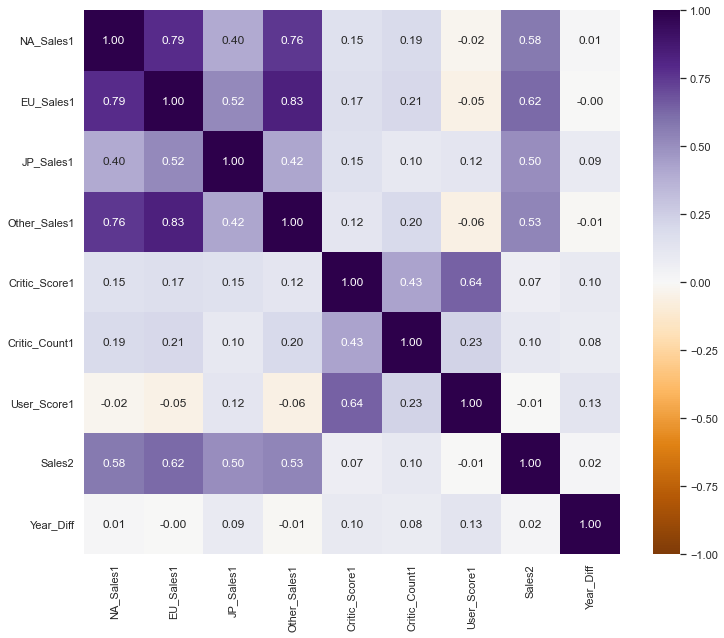

In [31]:
# Correlation heatmap for all numeric variables

f = plt.figure(figsize = (12, 10))
sb.heatmap(num_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = '0.2f', cmap = 'PuOr')

(0.0, 20.0)

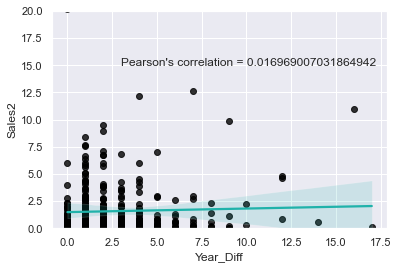

In [32]:
# Import scipy.stats for Pearson's correlation coefficient
import scipy.stats as st


# Plot Sales2 against Year_Diff

corr, _ = st.pearsonr(num_df['Year_Diff'], num_df['Sales2'])

sb.regplot(x=num_df['Year_Diff'], y=num_df['Sales2'],
           scatter_kws={'color':'black'}, line_kws={'color':'lightseagreen'})
plt.text(3, 15, f"Pearson's correlation = {corr}", fontsize = 12)
plt.ylim(0,20)

# Correlation coefficient is low: 0.01697
# Year_Diff variable will not be used in the regression model

(0.0, 20.0)

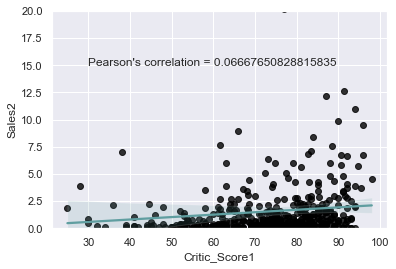

In [33]:
# Plot Sales2 against Critic_Score1

corr, _ = st.pearsonr(num_df['Critic_Score1'], num_df['Sales2'])

sb.regplot(x=num_df['Critic_Score1'], y=num_df['Sales2'],
           scatter_kws={'color':'black'}, line_kws={'color':'cadetblue'})
plt.text(30, 15, f"Pearson's correlation = {corr}", fontsize = 12)
plt.ylim(0,20)

# Correlation coefficient is low: 0.06668
# Critic_Score1 variable will not be used in the regression model

(0.0, 20.0)

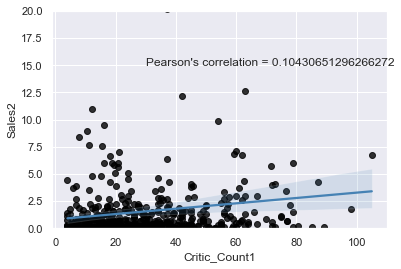

In [34]:
# Plot Sales2 against Critic_Count1

corr, _ = st.pearsonr(num_df['Critic_Count1'], num_df['Sales2'])

sb.regplot(x=num_df['Critic_Count1'], y=num_df['Sales2'],
           scatter_kws={'color':'black'}, line_kws={'color':'steelblue'})
plt.text(30, 15, f"Pearson's correlation = {corr}", fontsize = 12)
plt.ylim(0,20)

# Correlation coefficient is low: 0.1043
# Critic_Count1 variable will not be used in the regression model

(0.0, 20.0)

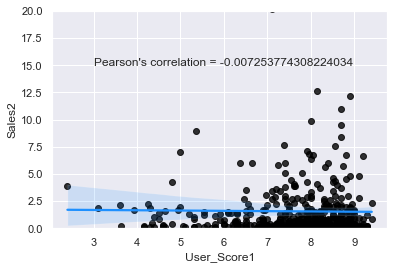

In [35]:
# Plot Sales2 against User_Score1

corr, _ = st.pearsonr(num_df['User_Score1'], num_df['Sales2'])

sb.regplot(x=num_df['User_Score1'], y=num_df['Sales2'],
           scatter_kws={'color':'black'}, line_kws={'color':'dodgerblue'})
plt.text(3, 15, f"Pearson's correlation = {corr}", fontsize = 12)
plt.ylim(0,20)

# Correlation coefficient is low: -0.007254
# User_Score1 variable will not be used in the regression model

In [36]:
num_df['Sales2'].describe()

count    460.000000
mean       1.562522
std        4.487651
min        0.010000
25%        0.190000
50%        0.585000
75%        1.567500
max       82.530000
Name: Sales2, dtype: float64

In [37]:
num_df['NA_Sales1'].describe()

count    460.000000
mean       0.944109
std        1.632150
min        0.000000
25%        0.110000
50%        0.410000
75%        1.032500
max       15.000000
Name: NA_Sales1, dtype: float64

In [38]:
num_df['EU_Sales1'].describe()

count    460.000000
mean       0.557543
std        1.060956
min        0.000000
25%        0.040000
50%        0.170000
75%        0.602500
max        9.180000
Name: EU_Sales1, dtype: float64

In [39]:
num_df['JP_Sales1'].describe().describe()

count      8.000000
mean      58.411023
std      162.281846
min        0.000000
25%        0.000000
50%        0.131424
75%        2.018999
max      460.000000
Name: JP_Sales1, dtype: float64

In [40]:
num_df['Other_Sales1'].describe()

count    460.000000
mean       0.173326
std        0.374687
min        0.000000
25%        0.017500
50%        0.060000
75%        0.180000
max        3.510000
Name: Other_Sales1, dtype: float64

(0.0, 20.0)

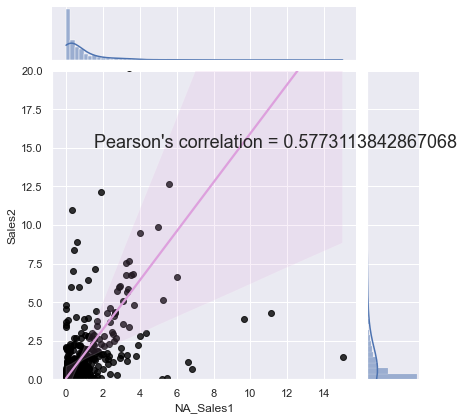

In [41]:
# Jointplot of Sales2 against NA_Sales1

sb.jointplot(data=num_df, x='NA_Sales1', y='Sales2', height=6, kind='reg',
             scatter_kws={'color':'black'}, line_kws={'color':'plum'})

corr, _ = st.pearsonr(num_df['NA_Sales1'], num_df['Sales2'])

plt.text(-1000, 15, f"Pearson's correlation = {corr}", fontsize = 18)
plt.ylim(0,20)

# Correlation coefficient is moderate: 0.5773
# NA_Sales1 variable will be used in the regression model

(0.0, 20.0)

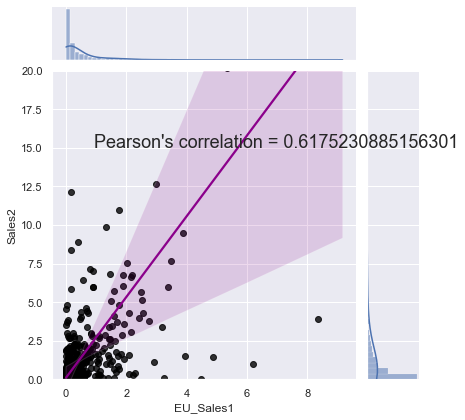

In [42]:
# Jointplot of Sales2 against EU_Sales1

sb.jointplot(data=num_df, x='EU_Sales1', y='Sales2', height=6, kind='reg',
             scatter_kws={'color':'black'}, line_kws={'color':'darkmagenta'})

corr, _ = st.pearsonr(num_df['EU_Sales1'], num_df['Sales2'])

plt.text(-1000, 15, f"Pearson's correlation = {corr}", fontsize=18)
plt.ylim(0,20)

(0.0, 20.0)

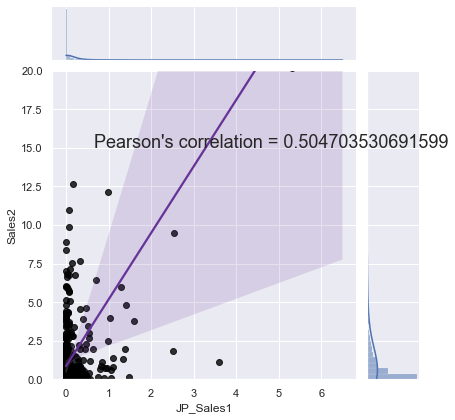

In [43]:
# Jointplot of Sales2 against JP_Sales1

sb.jointplot(data=num_df, x='JP_Sales1', y='Sales2', height=6, kind='reg', 
             scatter_kws={'color':'black'}, line_kws={'color':'rebeccapurple'})

corr, _ = st.pearsonr(num_df['JP_Sales1'], num_df['Sales2'])

plt.text(-1000, 15, f"Pearson's correlation = {corr}", fontsize=18)
plt.ylim(0,20)

# Correlation coefficient is moderate: 0.5047
# JP_Sales1 variable will be used in the regression model

(0.0, 20.0)

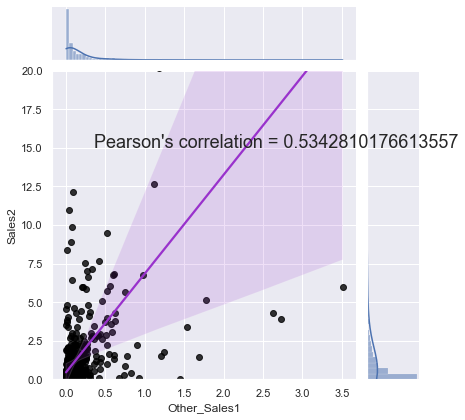

In [44]:
# Jointplot of Sales2 against Other_Sales1

sb.jointplot(data=num_df, x='Other_Sales1', y='Sales2', height=6, kind='reg', 
            scatter_kws={'color':'black'}, line_kws={'color':'darkorchid'})

corr, _ = st.pearsonr(num_df['Other_Sales1'], num_df['Sales2'])

plt.text(-1000, 15, f"Pearson's correlation = {corr}", fontsize=18)
plt.ylim(0,20)

# Correlation coefficient is moderate: 0.5343
# Other_Sales1 variable will be used in the regression model

##### Therefore, based on the correlation values of all numerical variables, NA_Sales1, EU_Sales1, JP_Sales1 and Other_Sales1 have the highest correlation values and will be used in the model training.

### Categorical Variables

In [45]:
# Create dataframe for categorical variables only

cat_df = main_vgdata[['Game1', 'Game2', 'Genre', 'Sales2']].copy()
cat_df.head()

,Game1,Game2,Genre,Sales2
0,Army Men: Air Attack 2,Army Men: Sarge's Heroes 2,Shooter,0.83
1,High Heat Major League Baseball 2003,High Heat Major League Baseball 2004,Sports,0.44
2,Armored Core: Nine Breaker,Armored Core: Last Raven,Simulation,0.18
3,Cooking Mama,Cooking Mama 2: Dinner With Friends,Simulation,3.58
4,Sniper Elite V2,Sniper Elite 3,Shooter,1.61


In [46]:
# Number of different genres

cat_df["Genre"].nunique()

12

In [47]:
# Count per genre

cat_df["Genre"].value_counts()

Action          86
Role-Playing    66
Shooter         59
Sports          46
Racing          38
Strategy        32
Platform        32
Misc            31
Fighting        26
Simulation      23
Puzzle          11
Adventure       10
Name: Genre, dtype: int64

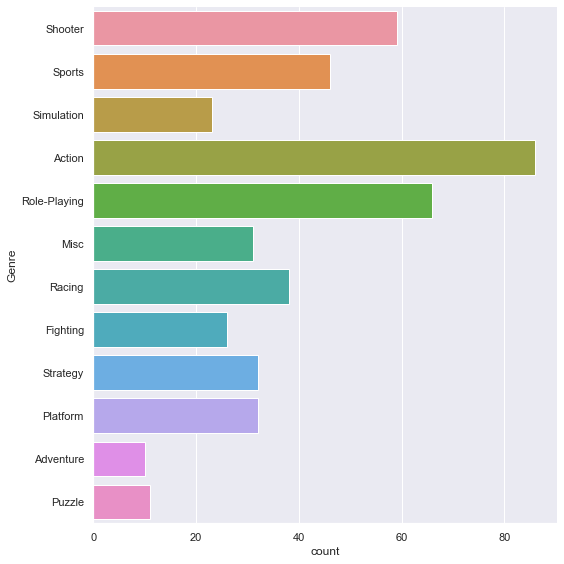

In [48]:
# Regular catplot for counts by genre

sb.catplot(y='Genre', data=cat_df, kind='count', height=8)

(0.0, 5.0)

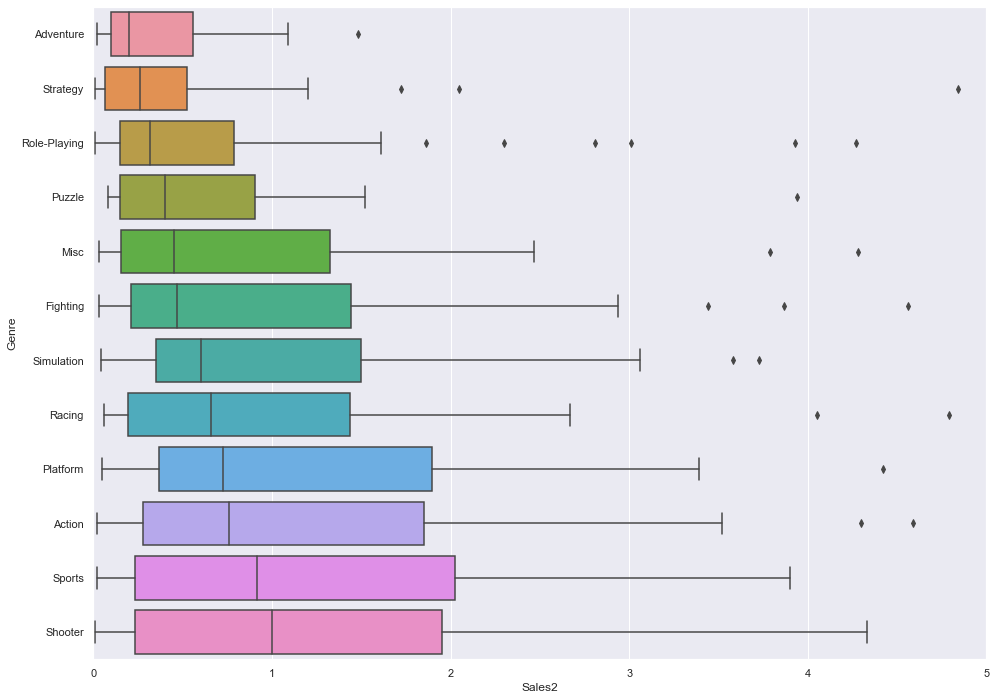

In [49]:
# Plot genre boxplots sorted by median

f = plt.figure(figsize=(16, 12))
sb.boxplot(y='Genre', x='Sales2', data=cat_df, 
           order = cat_df.groupby('Genre')['Sales2'].median().sort_values().index, orient='h')

plt.xlim((0, 5))

## Machine Learning

In [50]:
# Extract Response and Predictors to be used in Machine Learning

# Predictors: Genre, Rating2, NA_Sales1, EU_Sales1, JP_Sales1, Other_Sales1

# Categorical predictors: Get dummies
X = pd.DataFrame(main_vgdata['Genre'])
X = pd.get_dummies(data=X, drop_first=True, prefix = 'G')

# Numeric predictors
X['NA_Sales1'] = main_vgdata['NA_Sales1']
X['EU_Sales1'] = main_vgdata['EU_Sales1']
X['JP_Sales1'] = main_vgdata['JP_Sales1']
X['Other_Sales1'] = main_vgdata['Other_Sales1']

# Response
y = main_vgdata['Sales2']

In [51]:
# Types of data in X dataframe

X.dtypes

G_Adventure         uint8
G_Fighting          uint8
G_Misc              uint8
G_Platform          uint8
G_Puzzle            uint8
G_Racing            uint8
G_Role-Playing      uint8
G_Shooter           uint8
G_Simulation        uint8
G_Sports            uint8
G_Strategy          uint8
NA_Sales1         float64
EU_Sales1         float64
JP_Sales1         float64
Other_Sales1      float64
dtype: object

## Model 1: Random Forest Regression

In [52]:
# Import libraries for Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [53]:
# Split data into Train and Test
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest Regression)
randfr = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=14)
randfr.fit(X_trainA, y_trainA)
y_predA = randfr.predict(X_testA)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_testA, y_predA))
print('Mean Squared Error:', metrics.mean_squared_error(y_testA, y_predA))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testA, y_predA)))
print()

# Predict values using the trained model
y_train_predA = randfr.predict(X_trainA)
y_test_predA = randfr.predict(X_testA)

# Check the Goodness of Fit (on Train Data)
print('Goodness of Fit of Model \tTrain Dataset')
print('Explained Variance (R^2) \t:', randfr.score(X_trainA, y_trainA))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_trainA, y_train_predA))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_trainA, y_train_predA)))
print()

# Check the Goodness of Fit (on Test Data)
print('Goodness of Fit of Model \tTest Dataset')
print('Explained Variance (R^2) \t:', randfr.score(X_testA, y_testA))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_testA, y_test_predA))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_testA, y_test_predA)))
print()

Mean Absolute Error: 1.12244113496376
Mean Squared Error: 3.0420595988618446
Root Mean Squared Error: 1.7441501078926218

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.857800889344378
Mean Squared Error (MSE) 	: 3.3211466760344455
Root Mean Squared Error (RMSE) 	: 1.822401348779803

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5641429205852194
Mean Squared Error (MSE) 	: 3.0420595988618446
Root Mean Squared Error (RMSE) 	: 1.7441501078926218



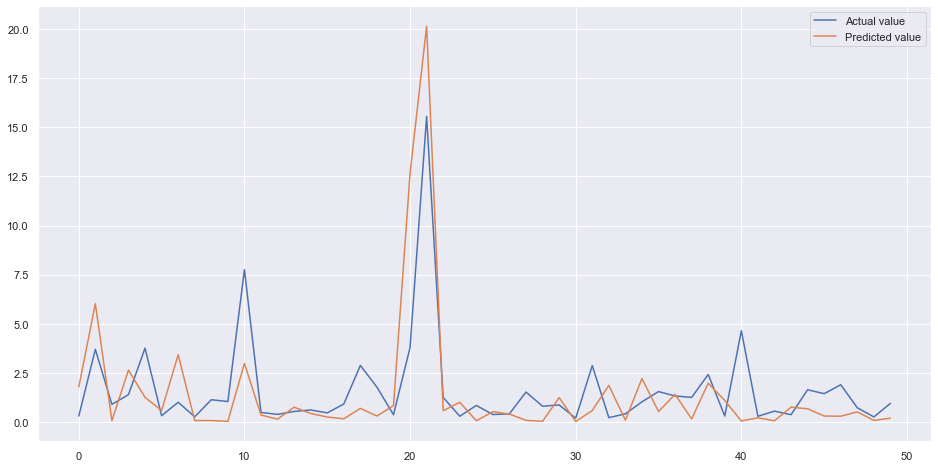

In [56]:
graphA = pd.DataFrame({'Predicted value':y_test_predA, 'Actual value':y_testA})
fig = plt.figure(figsize=(16,8))
graphA = graphA.reset_index()
graphA = graphA.drop(['index'],axis=1)
plt.plot(graphA[:50])
plt.legend(['Actual value','Predicted value'])

#### Explained variance of model on test set is quite low, so we carry out hyperparameter tuning using GridSearchCV.

### Refine the model using GridSearchCV

In [54]:
# Split into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
# Create search grid

search_grid = {
                'n_estimators': [10, 20, 30, 40], # number of trees in the random forest
                'max_depth': [15, 20, 25, 30], # maximum number of levels allowed in each decision tree
                'min_samples_split': [2, 4, 6, 8], # minimum sample number to split a node
                'min_samples_leaf': [1, 2, 3, 4] # minimum sample number that can be stored in a leaf node
}

In [56]:
# Find best parameters

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

gs_model = GridSearchCV(estimator=rf, param_grid=search_grid,
                             cv=5, verbose=2, n_jobs = -1)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=2)

In [57]:
# Print the best parameters

print ('Best Parameters: ', gs_model.best_params_, ' \n')

Best Parameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 20}  



In [58]:
# Using the best parameters, fit the model

optimised_rf = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10,
                                     random_state=9, bootstrap=True) 
optimised_rf.fit(X_train, y_train)
y_predB = optimised_rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predB))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predB))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predB)))

Mean Absolute Error: 1.0624297101449274
Mean Squared Error: 2.7745849602300536
Root Mean Squared Error: 1.665708546003788


In [59]:
# Predict values using the trained model
y_train_predB = optimised_rf.predict(X_train)
y_test_predB = optimised_rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print('Goodness of Fit of Model \tTrain Dataset')
print('Explained Variance (R^2) \t:', optimised_rf.score(X_train, y_train))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_train, y_train_predB))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_train, y_train_predB)))
print()

# Check the Goodness of Fit (on Test Data)
print('Goodness of Fit of Model \tTest Dataset')
print('Explained Variance (R^2) \t:', optimised_rf.score(X_test, y_test))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_test, y_test_predB))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_test, y_test_predB)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5510725666286764
Mean Squared Error (MSE) 	: 10.484973121475003
Root Mean Squared Error (RMSE) 	: 3.2380508213236867

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6024658761430901
Mean Squared Error (MSE) 	: 2.7745849602300536
Root Mean Squared Error (RMSE) 	: 1.665708546003788



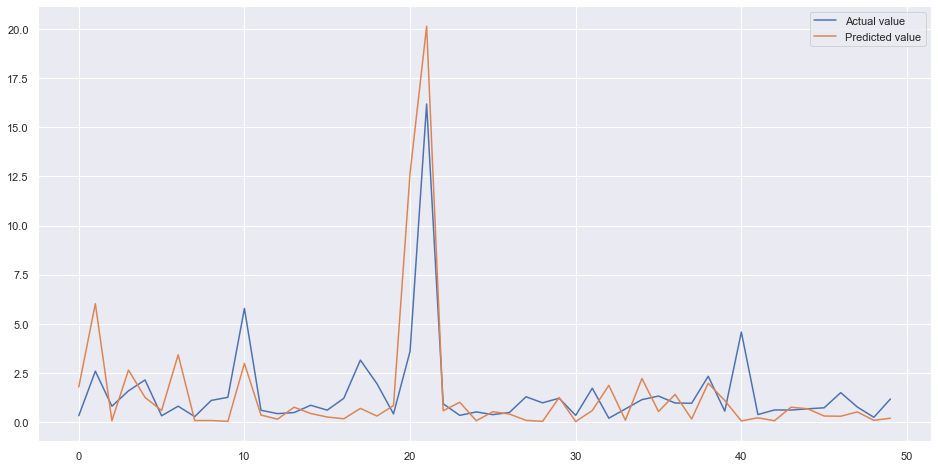

In [60]:
graphB = pd.DataFrame({'Predicted value':y_test_predB, 'Actual value':y_test})
fig = plt.figure(figsize=(16,8))
graphB = graphB.reset_index()
graphB = graphB.drop(['index'],axis=1)
plt.plot(graphB[:50])
plt.legend(['Actual value','Predicted value'])

## Model 2: XGBoost Regression

In [61]:
!pip install xgboost

In [62]:
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [63]:
# Split into Train and Test sets

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model (XGBoost Regression)
xgbr = XGBRegressor()
xgbr.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [64]:
# Predict values using the trained model
y_train_pred2A = xgbr.predict(X_train2)
y_test_pred2A = xgbr.predict(X_test2)

# Check the Goodness of Fit (on Train Data)
print('Goodness of Fit of Model \tTrain Dataset')
print('Explained Variance (R^2) \t:', xgbr.score(X_train2, y_train2))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_train2, y_train_pred2A))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_train2, y_train_pred2A)))
print()

# Check the Goodness of Fit (on Test Data)
print('Goodness of Fit of Model \tTest Dataset')
print('Explained Variance (R^2) \t:', xgbr.score(X_test2, y_test2))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_test2, y_test_pred2A))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_test2, y_test_pred2A)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9980527399001631
Mean Squared Error (MSE) 	: 0.04547944342359531
Root Mean Squared Error (RMSE) 	: 0.21325909927502582

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2977261145179303
Mean Squared Error (MSE) 	: 4.901512709691889
Root Mean Squared Error (RMSE) 	: 2.2139360220412625



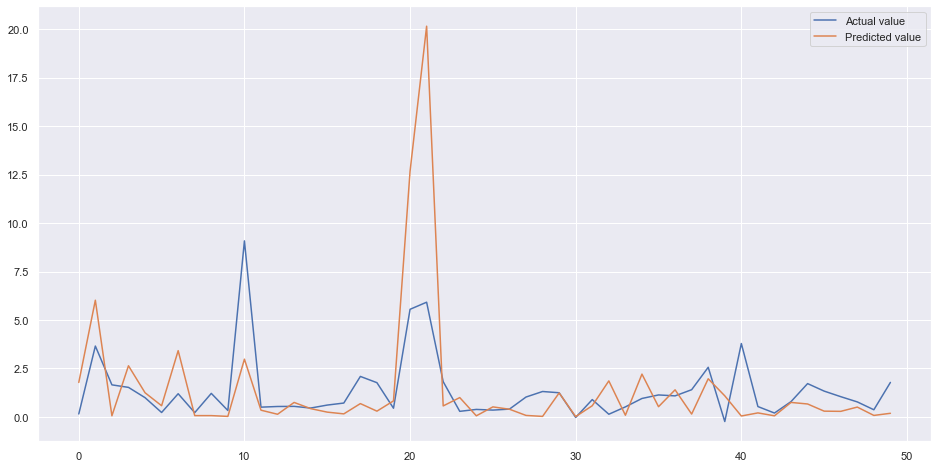

In [65]:
# Plot graph to show predicted values and actual values

testA = pd.DataFrame({'Predicted value':y_test_pred2A, 'Actual value':y_test2})
fig = plt.figure(figsize=(16,8))
testA = testA.reset_index()
testA = testA.drop(['index'],axis=1)
plt.plot(testA[:50])
plt.legend(['Actual value','Predicted value'])

#### Training score is high at >0.99, but RMSE of test set is high at 2.21.
#### Thus, we carry out hyperparameter tuning using RandomizedSearchCV.

### Refining the model using RandomizedSearchCV

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
# Set parameters

params = {
            'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
            'max_depth': [3, 4, 5, 6, 8, 10, 12, 15, 20],
            'min_child_weight' : [1, 3, 5, 7, 9, 10],
            'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2, 3, 4, 5],
            'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

In [94]:
# Find best parameters

rs_model = RandomizedSearchCV(estimator=xgbr, param_distributions=params, n_iter=10, n_jobs=-1, cv=10, verbose=1)
rs_model.fit(X_train2, y_train2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256,...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto'

In [95]:
# Set best parameters

optimised_xgbr = rs_model.best_estimator_

In [96]:
# Predict values using the trained model
y_train_pred2B = optimised_xgbr.predict(X_train2)
y_test_pred2B = optimised_xgbr.predict(X_test2)

# Check the Goodness of Fit (on Train Data)
print('Goodness of Fit of Model \tTrain Dataset')
print('Explained Variance (R^2) \t:', optimised_xgbr.score(X_train2, y_train2))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_train2, y_train_pred2B))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_train2, y_train_pred2B)))
print()

# Check the Goodness of Fit (on Test Data)
print('Goodness of Fit of Model \tTest Dataset')
print('Explained Variance (R^2) \t:', optimised_xgbr.score(X_test2, y_test2))
print('Mean Squared Error (MSE) \t:', mean_squared_error(y_test2, y_test_pred2B))
print('Root Mean Squared Error (RMSE) \t:', np.sqrt(mean_squared_error(y_test2, y_test_pred2B)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5076888250082858
Mean Squared Error (MSE) 	: 11.498226781165178
Root Mean Squared Error (RMSE) 	: 3.390903534629845

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6423456714297423
Mean Squared Error (MSE) 	: 2.4962443761668194
Root Mean Squared Error (RMSE) 	: 1.579950751183979



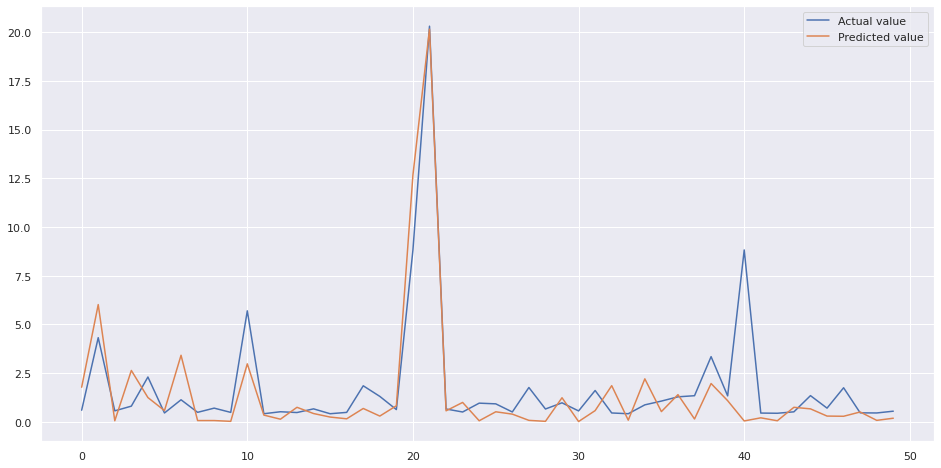

In [97]:
# Plot graph to show predicted values and actual values

testB = pd.DataFrame({'Predicted value':y_test_pred2B, 'Actual value':y_test2})
fig = plt.figure(figsize=(16,8))
testB = testB.reset_index()
testB = testB.drop(['index'],axis=1)
plt.plot(testB[:50])
plt.legend(['Actual value','Predicted value'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=909aa507-bb39-472e-a43e-27d0ba229cf0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>